## **Introduction** 

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. <br>

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness<br>

**Therefore, I will use the Covid-19 cases as a standard to choose the best neighborhood.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import geopandas as gpd


In [4]:
d3= pd.read_csv("3.csv")
d3.head(10)

,neighborhood_municipality,indv_tested,cases,deaths,update_date
0,Aleppo,362,6,0,2020-10-26
1,Allegheny Center (Pittsburgh),195,14,0,2020-10-26
2,Allegheny West (Pittsburgh),94,3,0,2020-10-26
3,Allentown (Pittsburgh),327,30,0,2020-10-26
4,Arlington (Pittsburgh),255,25,1,2020-10-26
5,Arlington Heights (Pittsburgh),52,1,1,2020-10-26
6,Aspinwall,375,16,0,2020-10-26
7,Avalon,731,40,4,2020-10-26
8,Baldwin Borough,3948,585,12,2020-10-26
9,Baldwin Township,264,26,1,2020-10-26


**I used the data from WPRDC. This data shows neighborhoods, the number of individual tested, the number of cases, deaths.** 

In [5]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   neighborhood_municipality  220 non-null    object
 1   indv_tested                220 non-null    int64 
 2   cases                      220 non-null    int64 
 3   deaths                     220 non-null    int64 
 4   update_date                220 non-null    object
dtypes: int64(3), object(2)
memory usage: 8.7+ KB


In [6]:
d3.sample(10)

,neighborhood_municipality,indv_tested,cases,deaths,update_date
200,Upper Lawrenceville (Pittsburgh),557,18,0,2020-10-26
208,West Homestead,277,30,0,2020-10-26
93,Heidelberg,161,7,0,2020-10-26
117,McKeesport,3554,260,10,2020-10-26
50,Crescent,211,18,2,2020-10-26
181,Springdale Borough,470,14,1,2020-10-26
38,Central Oakland (Pittsburgh),1339,237,0,2020-10-26
209,West Mifflin,2721,207,2,2020-10-26
116,McCandless,4601,260,17,2020-10-26
31,California-Kirkbride (Pittsburgh),119,12,1,2020-10-26


## **Analyze from indv_ tested, cases, and death**

## Cases

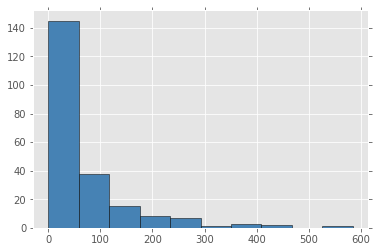

In [7]:
plt.style.use('ggplot')
plt.hist(d3.cases, 
        bins = 10, 
        color = 'steelblue', 
        edgecolor = 'k')
plt.tick_params(top='off', right='off')
plt.show()

**For the bar chart, the y-axis represents the number of neighborhoods, and the x-axis represents the cases. 
We can conclude that most neighborhoods have cases between 0-50, several have cases over 500**

In [8]:
d3.sort_values(by = "cases", ascending = False).head(10)

,neighborhood_municipality,indv_tested,cases,deaths,update_date
8,Baldwin Borough,3948,585,12,2020-10-26
162,Ross,5206,452,41,2020-10-26
144,Penn Hills,6497,436,7,2020-10-26
125,Mount Lebanon,9462,391,3,2020-10-26
215,Whitehall,2418,376,7,2020-10-26
122,Monroeville,5235,352,13,2020-10-26
164,Scott,3119,309,16,2020-10-26
123,Moon,3152,272,9,2020-10-26
117,McKeesport,3554,260,10,2020-10-26
116,McCandless,4601,260,17,2020-10-26


### By ascending cases, we can conculde the most dangerous neighborhood is **Baldwin Borough**

In [22]:
d3.sort_values(by = "cases", ascending = False).tail(10)

,neighborhood_municipality,indv_tested,cases,deaths,update_date
160,Ridgemont (Pittsburgh),378,2,0,2020-10-26
204,Wall,62,2,0,2020-10-26
118,Mcdonald,32,2,0,2020-10-26
40,Chartiers City (Pittsburgh),65,2,0,2020-10-26
91,Haysville,12,2,0,2020-10-26
5,Arlington Heights (Pittsburgh),52,1,1,2020-10-26
128,Mt. Oliver (Pittsburgh),52,0,0,2020-10-26
41,Chateau (Pittsburgh),18,0,0,2020-10-26
195,Trafford,5,0,0,2020-10-26
185,St. Clair (Pittsburgh),23,0,0,2020-10-26


### By ascending cases, we can conculde the most safe neighborhood are **Mt.Oliver, Chateau, Trafford, St.Clair**

In [9]:
neighborhoods= gpd.read_file("Neighborhoods/Neighborhoods_.shp")

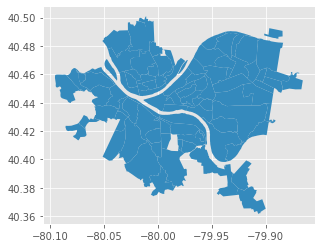

In [10]:
neighborhoods.plot()

In [11]:
num_cases = d3.groupby("neighborhood_municipality").sum()['cases']
num_cases.sort_values(ascending=False)

neighborhood_municipality
Baldwin Borough                   585
Ross                              452
Penn Hills                        436
Mount Lebanon                     391
Whitehall                         376
                                 ... 
Arlington Heights (Pittsburgh)      1
Mt. Oliver (Pittsburgh)             0
Chateau (Pittsburgh)                0
St. Clair (Pittsburgh)              0
Trafford                            0
Name: cases, Length: 220, dtype: int64

In [12]:
neighborhoods[['hood','area','perimeter','geometry']]

,hood,area,perimeter,geometry
0,Central Oakland,7843108.0,11526.863,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,13904629.0,20941.387,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,5999801.5,18271.426,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,7202139.0,15696.759,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,16947852.0,23903.078,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...,...
85,Ridgemont,10278895.0,16268.131,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,5579501.0,18776.656,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,6050988.0,11711.301,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,12713036.0,18931.703,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


In [13]:
neighborhoods['hood'] = neighborhoods['hood'] + ' (Pittsburgh)'

In [14]:
neighborhoods[['hood','area','perimeter','geometry']]

,hood,area,perimeter,geometry
0,Central Oakland (Pittsburgh),7843108.0,11526.863,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland (Pittsburgh),13904629.0,20941.387,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland (Pittsburgh),5999801.5,18271.426,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts (Pittsburgh),7202139.0,15696.759,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District (Pittsburgh),16947852.0,23903.078,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...,...
85,Ridgemont (Pittsburgh),10278895.0,16268.131,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End (Pittsburgh),5579501.0,18776.656,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride (Pittsburgh),6050988.0,11711.301,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel (Pittsburgh),12713036.0,18931.703,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


In [15]:
# do the merge
cases_map = neighborhoods.merge(num_cases, how='left', left_on='hood', right_on='neighborhood_municipality')
# look at the head to confirm it merged correctly
cases_map[['hood','cases','geometry']].head(10)

,hood,cases,geometry
0,Central Oakland (Pittsburgh),237.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland (Pittsburgh),68.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland (Pittsburgh),49.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts (Pittsburgh),49.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District (Pittsburgh),18.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
5,Central Business District (Pittsburgh),69.0,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
6,Spring Hill-City View (Pittsburgh),30.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South (Pittsburgh),72.0,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill (Pittsburgh),14.0,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Northview Heights (Pittsburgh),17.0,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."


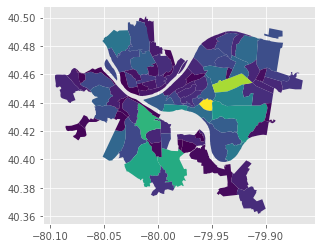

In [16]:
cases_map.plot(column='cases')

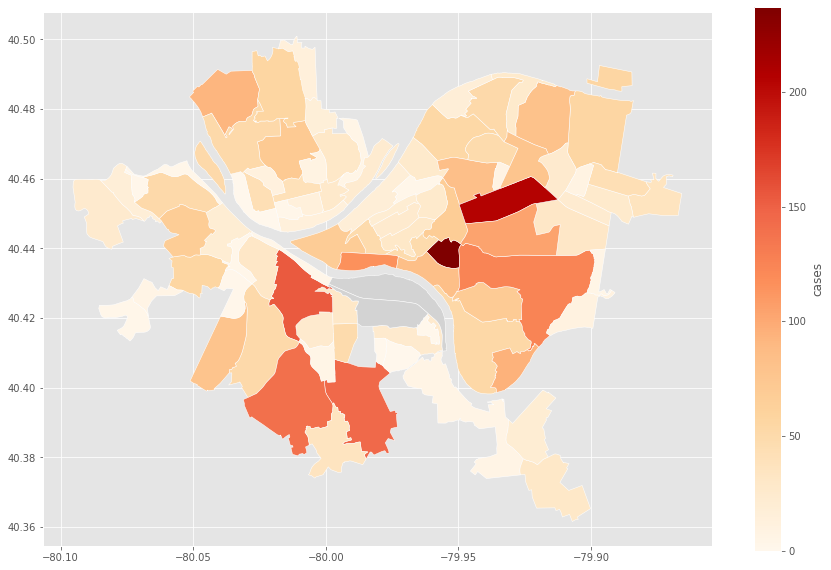

In [17]:
cases_map.plot(column='cases', 
               cmap='OrRd',              
               edgecolor="white",
               legend=True,             
               legend_kwds={'label': "cases"}, 
               figsize=(15, 10),      
               missing_kwds={"color": "lightgrey"} 
               )

**Here is the map to show the number of cases** 

### **Conclusion: The most safe neighborhoods are Mt.Oliver, Chateau, Trafford, St.Clair** 